# Convolutional Neural Network to Classify Images of Cats and Dogs
The following notebook was completed as an assignment for my Deep Learning course as part of my Master's Degree in Data Science at Regis University.  The Notebook connects with Google Drive where I have a dataset of 4000 images, 2000 cats and 2000 dogs.  After splitting the data into training, validation, and test sets, I run a simple model to classify each image as "cat" or "dog".  I then build another model with image augmentation to increase the size of the data to hopefully improve the results.  Finally, I build two pretrained transfer learning models with image augmentation to see how high I can push the accuracy with hyper parameter tuning.

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Import necessary Python modules

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
import os, shutil # Library for navigating files
from google.colab import drive # Library to mount google drives
np.random.seed(42)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Mount google drive where images are stored

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Specify the base directory where images are located
base_dir = '/content/gdrive/My Drive/Cats_and_Dogs'

In [ ]:
# Specify the traning, validation, and test dirrectories.  
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Specify the the classess in the training, validataion, and test dirrectories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
# Check the number of files in each class dirrectory
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


The following data generators are used to pull images from disk in batches, as loading such a large dataset in memory would quickly eat up RAM.  All pixels are normalized when images pass through these generators to values between 0 and 1.

In [ ]:
# Normalize the pixels in the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Initialize datagenerators to load data from directories

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels
    batch_size=20, 
    class_mode='binary') 

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/50
100/100 [==============================] - 820s 8s/step - loss: 1.3907 - accuracy: 0.5995 - val_loss: 1.5969 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 71s 712ms/step - loss: 0.8334 - accuracy: 0.6955 - val_loss: 1.5351 - val_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 72s 712ms/step - loss: 0.5229 - accuracy: 0.7790 - val_loss: 1.1358 - val_accuracy: 0.5320
Epoch 4/50
100/100 [==============================] - 69s 693ms/step - loss: 0.3813 - accuracy: 0.8410 - val_loss: 1.6940 - val_accuracy: 0.5320
Epoch 5/50
100/100 [==============================] - 69s 691ms/step - loss: 0.2797 - accuracy: 0.8815 - val_loss: 0.7278 - val_accuracy: 0.6740
Epoch 6/50
100/100 [==============================] - 73s 733ms/step - loss: 0.2194 - accuracy: 0.9100 - val_loss: 0.9079 - val_accuracy: 0.6780
Epoch 7/50
100/100 [==============================] - 69s 693ms/step - loss: 0.1899 - accuracy: 0.9185 - val_loss: 0.8637 - val_accu

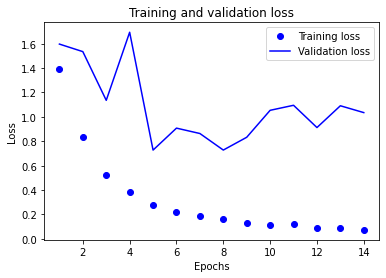

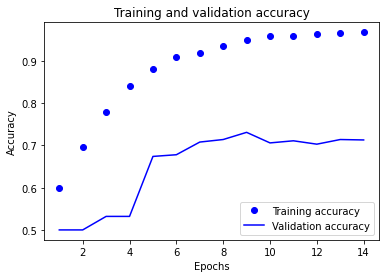

50/50 [==============================] - 419s 9s/step - loss: 0.8771 - accuracy: 0.7110
test_acc: 0.7110000252723694


In [ ]:
# Build model 

backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history = model.fit( 
    train_generator, # Take data from the train_generator
    steps_per_epoch=100, 
    epochs=50, # Train data for 50 epochs
    validation_data=validataion_generator, # Take data from the validataion generator
    validation_steps=50, 
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_generator, steps = 50) 
                                                                          
print('test_acc:', test_acc)

model.save('cats_and_dogs_small_1.h5')

## Rebuild model with image augmentation to increase size of dataset

After achieving a relatively unimpressive accuracy on 71% with the simple model built from scratch, I include augmentation to introduce noise and variability to the data in hopes of improving generalization.

In [ ]:
# Apply the data augmentation to the data.
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

test_datagen2 = ImageDataGenerator(rescale=1./255) 

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator2 = train_datagen2.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator2 = test_datagen2.flow_from_directory( 
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/50
100/100 [==============================] - 481s 5s/step - loss: 1.6663 - accuracy: 0.5730 - val_loss: 1.2034 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 97s 967ms/step - loss: 1.1566 - accuracy: 0.5900 - val_loss: 1.0450 - val_accuracy: 0.5070
Epoch 3/50
100/100 [==============================] - 95s 952ms/step - loss: 0.8031 - accuracy: 0.6035 - val_loss: 0.6713 - val_accuracy: 0.5910
Epoch 4/50
100/100 [==============================] - 95s 954ms/step - loss: 0.7297 - accuracy: 0.5965 - val_loss: 0.7992 - val_accuracy: 0.5620
Epoch 5/50
100/100 [==============================] - 96s 955ms/step - loss: 0.6693 - accuracy: 0.6195 - val_loss: 0.6609 - val_accuracy: 0.6160
Epoch 6/50
100/100 [==============================] - 99s 992ms/step - loss: 0.6543 - accuracy: 0.6240 - val_loss: 0.6309 - val_accuracy: 0.6260
Epoch 7/50
100/100 [==============================] - 95s 951ms/step - loss: 0.6300 - accuracy: 0.6695 - val_loss: 0.6406 - val_accu

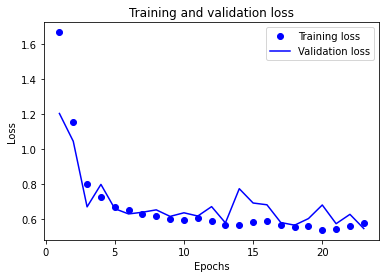

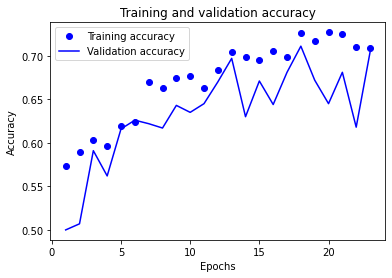

50/50 [==============================] - 219s 4s/step - loss: 0.5934 - accuracy: 0.6960
test_acc: 0.6959999799728394


In [ ]:
backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validataion_generator2,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_generator2, steps = 50)
print('test_acc:', test_acc)

model.save('cats_and_dogs_small_2.h5')

## Build new model with pre-trained convolutional backbone

The second model surprisingly did worse, but rather than fine tune the hyper-parameters on a model that didn't even achieve 70% accuracy, I wanted to move on and utilize pre-trained network weights from VGG16

In [ ]:
from tensorflow.keras.applications import VGG16 # Import the VGG16 library

In [ ]:
conv_base = VGG16 (weights = 'imagenet', #Useing the VGG66 CNN that was trained on ImageNet data.  
                  include_top = False, # We are using our own classification (dog or cat) and not the ImageNet multiclassification. So include top = false.
                  input_shape = (150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = False

In [ ]:
modelvgg16 = models.Sequential()
modelvgg16.add(conv_base) # Add the VG166 weights
modelvgg16.add(layers.Flatten())
modelvgg16.add(layers.Dense(512, activation = 'relu'))
modelvgg16.add(layers.Dense(1, activation = 'sigmoid'))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 724s 7s/step - loss: 0.4927 - accuracy: 0.7550 - val_loss: 0.3995 - val_accuracy: 0.8300
Epoch 2/30
100/100 [==============================] - 695s 7s/step - loss: 0.3773 - accuracy: 0.8330 - val_loss: 0.3730 - val_accuracy: 0.8280
Epoch 3/30
100/100 [==============================] - 693s 7s/step - loss: 0.3575 - accuracy: 0.8415 - val_loss: 0.3299 - val_accuracy: 0.8560
Epoch 4/30
100/100 [==============================] - 692s 7s/step - loss: 0.3440 - accuracy: 0.8475 - val_loss: 0.3596 - val_accuracy: 0.8320
Epoch 5/30
100/100 [==============================] - 693s 7s/step - loss: 0.2952 - accuracy: 0.8735 - val_loss: 0.3416 - val_accuracy: 0.8450
Epoch 6/30
100/100 [==============================] - 696s 7s/step - loss: 0.3270 - accuracy: 0.8595 - val_loss: 0.3598 - val_accuracy: 0.8330
Epoch 7/30
100/1

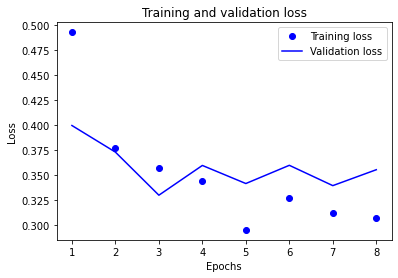

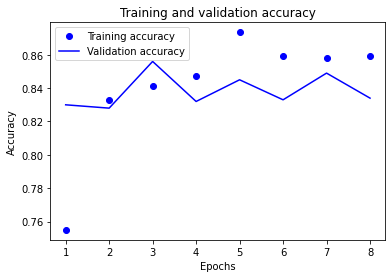

50/50 [==============================] - 238s 5s/step - loss: 0.2689 - accuracy: 0.8950
test_acc: 0.8949999809265137


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelvgg16.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelvgg16.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelvgg16.evaluate(test_generator, steps = 50)
print('test_acc:', test_acc)

modelvgg16.save('cats_and_dogs_small_3.h5')

## Tune the model

The pre-trained model saw a significant boost in accuracy.  I ran it again, this time unfreezing the final convolutional block weights so they would optimize for this data during backpropogation.  I also added more layers to the dense head of the network.

In [ ]:
backend.clear_session()
vgg16_base_2 = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

# Here we freeze all the layers except the last 4.
for layer in vgg16_base_2.layers[:-8]:
  layer.trainable = False
for layer in vgg16_base_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe5e7d008b0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e7d5ce80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e7d07790> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe5fd4c7760> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e7d75b80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e7d5cfd0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe6649ea040> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e9530a00> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e9bf1130> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5ee552340> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe5e7d1be80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e7cd7eb0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe5e7cd7f70> True
<keras.layers.convolutio

In [ ]:
vgg16_base_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 1146s 11s/step - loss: 0.5023 - accuracy: 0.7580 - val_loss: 0.7297 - val_accuracy: 0.7200
Epoch 2/30
100/100 [==============================] - 1131s 11s/step - loss: 0.3365 - accuracy: 0.8435 - val_loss: 0.2342 - val_accuracy: 0.8970
Epoch 3/30
100/100 [==============================] - 1123s 11s/step - loss: 0.2321 - accuracy: 0.9070 - val_loss: 0.2059 - val_accuracy: 0.9130
Epoch 4/30
100/100 [==============================] - 1127s 11s/step - loss: 0.2455 - accuracy: 0.9010 - val_loss: 0.2077 - val_accuracy: 0.9160
Epoch 5/30
100/100 [==============================] - 1118s 11s/step - loss: 0.1886 - accuracy: 0.9265 - val_loss: 0.1899 - val_accuracy: 0.9120
Epoch 6/30
100/100 [==============================] - 1118s 11s/step - loss: 0.1747 - accuracy: 0.9335 - val_loss: 0.2211 - val_accuracy: 0.9160
Epoch 7/30
100/100 [==============================] - 1125s 11s/step - loss: 0.1776 - accuracy: 0.9275 - val_loss: 0.2414 - val_ac

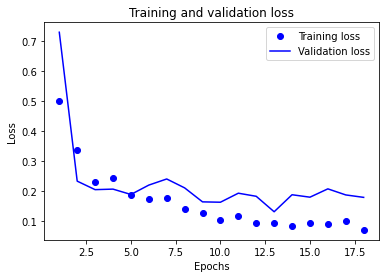

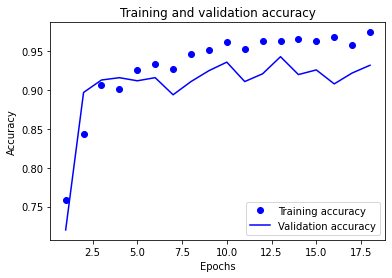

50/50 [==============================] - 232s 5s/step - loss: 0.1275 - accuracy: 0.9540
test_acc: 0.9539999961853027


In [ ]:
modelvgg16_train = models.Sequential()
modelvgg16_train.add(vgg16_base_2)
modelvgg16_train.add(layers.Flatten())
modelvgg16_train.add(layers.Dense(512, activation = 'relu'))
modelvgg16_train.add(layers.Dense(256, activation = 'relu'))
modelvgg16_train.add(layers.Dense(128, activation = 'relu'))
modelvgg16_train.add(layers.Dense(64, activation = 'relu'))
modelvgg16_train.add(layers.Dense(1, activation = 'sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelvgg16_train.compile(optimizer = optimizers.Adam(lr=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelvgg16_train.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelvgg16_train.evaluate(test_generator, steps = 50)
print('test_acc:', test_acc)

modelvgg16_train.save('cats_and_dogs_small_4.h5')

## Deeper transfer model

I again saw a jump in accuracy to over 95%.  I now wanted to utilize a more recent transfer learning model that was significantly deeper than the previous one.  Xception is based on the Inception model and has over 70 layers, reducing the initial input images through convolutions from 150x150 pixels to 5x5 feature maps.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

backend.clear_session()
conv_01 = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False,input_shape = (150, 150, 3))

for layer in conv_01.layers[:-12]:
  layer.trainable = False
for layer in conv_01.layers:
  print(layer, layer.trainable)

conv_01.summary()

<keras.engine.input_layer.InputLayer object at 0x7f039824a430> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f032d7bd190> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f032d7bd5b0> False
<keras.layers.core.activation.Activation object at 0x7f033cab15b0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f032dafd2b0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f032daf5af0> False
<keras.layers.core.activation.Activation object at 0x7f0392e39250> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f03291558b0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0329168760> False
<keras.layers.core.activation.Activation object at 0x7f0329160fa0> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f0329155c40> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 1000s 10s/step - loss: 0.3455 - accuracy: 0.8520 - val_loss: 0.2213 - val_accuracy: 0.9330
Epoch 2/30
100/100 [==============================] - 363s 4s/step - loss: 0.1942 - accuracy: 0.9170 - val_loss: 0.1787 - val_accuracy: 0.9440
Epoch 3/30
100/100 [==============================] - 359s 4s/step - loss: 0.1479 - accuracy: 0.9405 - val_loss: 0.1742 - val_accuracy: 0.9400
Epoch 4/30
100/100 [==============================] - 358s 4s/step - loss: 0.1573 - accuracy: 0.9430 - val_loss: 0.1592 - val_accuracy: 0.9310
Epoch 5/30
100/100 [==============================] - 356s 4s/step - loss: 0.1241 - accuracy: 0.9510 - val_loss: 0.1737 - val_accuracy: 0.9420
Epoch 6/30
100/100 [==============================] - 358s 4s/step - loss: 0.1293 - accuracy: 0.9510 - val_loss: 0.1651 - val_accuracy: 0.9390
Epoch 7/30
100

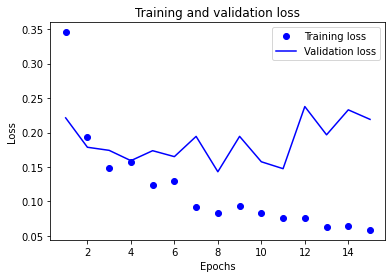

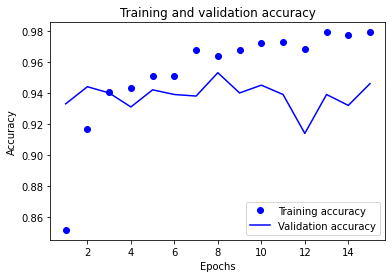

50/50 [==============================] - 461s 9s/step - loss: 0.0967 - accuracy: 0.9680
test_acc: 0.9679999947547913


In [ ]:
modelxception = models.Sequential()
modelxception.add(conv_01) 
modelxception.add(layers.Flatten())
modelxception.add(layers.Dense(512, activation = 'relu'))
modelxception.add(layers.Dense(256, activation = 'relu'))
modelxception.add(layers.Dense(128, activation = 'relu'))
modelxception.add(layers.Dense(1, activation = 'sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelxception.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelxception.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelxception.evaluate(test_generator, steps = 50)
print('test_acc:', test_acc)

modelxception.save('cats_and_dogs_small_3.h5')

## Unfreeze final model layers

I saw another small improvement in accuracy.  I ran the same model by unfreezing the final convolutional block.  I also corrected a mistake where I was applying image augmentation to the validation set, which may have randomly caused the best network weights to underperform based on the random modifications to the validation set.  Additionally, I added Batch Normalization and Dropout to the dense network head.  Finally, I reduced the learning by a factor of 10, added more epochs (100 total), and increased the patience of the model to give it a chance to converge more slowly toward the optimal weights.

In [ ]:
backend.clear_session()
conv_02 = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False,input_shape = (150, 150, 3))

for layer in conv_02.layers[:-6]:
  layer.trainable = False

for layer in conv_02.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0328f05850> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0328f058e0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f03270ca7c0> False
<keras.layers.core.activation.Activation object at 0x7f03270caf10> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0328eef220> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0328f052e0> False
<keras.layers.core.activation.Activation object at 0x7f03290429a0> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f03290ec160> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f03290d5520> False
<keras.layers.core.activation.Activation object at 0x7f032902dd30> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f0329028f10> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 346s 3s/step - loss: 0.4667 - accuracy: 0.7680 - val_loss: 0.2336 - val_accuracy: 0.9470
Epoch 2/100
100/100 [==============================] - 330s 3s/step - loss: 0.3024 - accuracy: 0.8680 - val_loss: 0.1624 - val_accuracy: 0.9450
Epoch 3/100
100/100 [==============================] - 328s 3s/step - loss: 0.2526 - accuracy: 0.8870 - val_loss: 0.1371 - val_accuracy: 0.9480
Epoch 4/100
100/100 [==============================] - 333s 3s/step - loss: 0.2322 - accuracy: 0.9000 - val_loss: 0.1291 - val_accuracy: 0.9490
Epoch 5/100
100/100 [==============================] - 328s 3s/step - loss: 0.2303 - accuracy: 0.8955 - val_loss: 0.1136 - val_accuracy: 0.9580
Epoch 6/100
100/100 [==============================] - 330s 3s/step - loss: 0.2183 - accuracy: 0.9045 - val_loss: 0.1083 - val_accuracy: 0.9600
Epoch 7/10

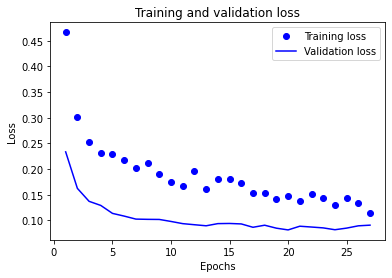

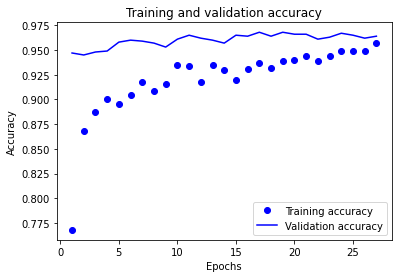

50/50 [==============================] - 85s 2s/step - loss: 0.0914 - accuracy: 0.9690
test_acc: 0.968999981880188


In [ ]:
modelxception = models.Sequential()
modelxception.add(conv_02) 
modelxception.add(layers.Flatten())
modelxception.add(layers.Dense(512, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dropout(0.3))
modelxception.add(layers.Dense(256, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dropout(0.3))
modelxception.add(layers.Dense(128, activation = 'relu'))
modelxception.add(layers.Dense(1, activation = 'sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelxception.compile(optimizer = optimizers.Adam(learning_rate = 0.00001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelxception.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelxception.evaluate(test_generator, steps = 50)
print('test_acc:', test_acc)

modelxception.save('cats_and_dogs_small_4.h5')

The negligible increase in accuracy indicates 97% may be the upper limit for this model and this particular dataset, but I wanted to do one more run to see if a deeper network would generalize better.  I added several dense layers, and increased the learning rate by a factor of 5.

In [ ]:
backend.clear_session()
conv_03 = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False,input_shape = (150, 150, 3))

In [ ]:
for layer in conv_03.layers[:-16]:
  layer.trainable = False

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 374s 4s/step - loss: 0.5648 - accuracy: 0.7105 - val_loss: 0.3113 - val_accuracy: 0.9100
Epoch 2/100
100/100 [==============================] - 365s 4s/step - loss: 0.3927 - accuracy: 0.8255 - val_loss: 0.1584 - val_accuracy: 0.9590
Epoch 3/100
100/100 [==============================] - 368s 4s/step - loss: 0.3001 - accuracy: 0.8780 - val_loss: 0.1214 - val_accuracy: 0.9580
Epoch 4/100
100/100 [==============================] - 364s 4s/step - loss: 0.2730 - accuracy: 0.8875 - val_loss: 0.1356 - val_accuracy: 0.9530
Epoch 5/100
100/100 [==============================] - 369s 4s/step - loss: 0.2377 - accuracy: 0.8990 - val_loss: 0.1260 - val_accuracy: 0.9610
Epoch 6/100
100/100 [==============================] - 361s 4s/step - loss: 0.2215 - accuracy: 0.9075 - val_loss: 0.1205 - val_accuracy: 0.9630
Epoch 7/10

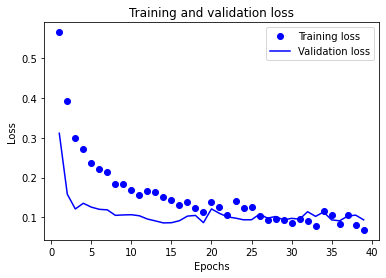

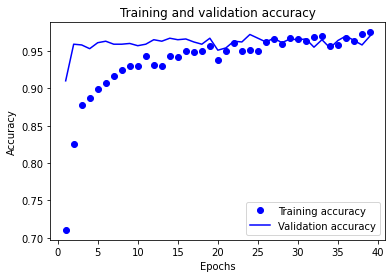

50/50 [==============================] - 85s 2s/step - loss: 0.0869 - accuracy: 0.9780
test_acc: 0.9779999852180481


In [ ]:
modelxception = models.Sequential()
modelxception.add(conv_03) 
modelxception.add(layers.Flatten())
modelxception.add(layers.Dense(512, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dense(512, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dropout(0.3))
modelxception.add(layers.Dense(256, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dense(256, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dropout(0.3))
modelxception.add(layers.Dense(128, activation = 'relu'))
modelxception.add(BatchNormalization())
modelxception.add(layers.Dense(128, activation = 'relu'))
modelxception.add(layers.Dense(1, activation = 'sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelxception.compile(optimizer = optimizers.Adam(learning_rate = 0.00005),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelxception.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validataion_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelxception.evaluate(test_generator, steps = 50)
print('test_acc:', test_acc)

modelxception.save('cats_and_dogs_small_4.h5')

## Discussion

It may be possible to push the accuracy further by continuing to tweak the hyperparameters, however it could be argued that would be overfitting to model weights to the test set.  I am satisfied with an accuracy of 97.8% for a training set of only 2000 images, so I will leave this as the final model.  A larger data set would allow me to split the data further into multiple test sets, allowing more hyperparameter tuning without the risk of overfitting to the individual test set.